In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\hackveda\\Grade_Set_1_Classification.csv")

In [3]:
df

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,1
6,8,1
7,9,1
8,10,1


In [4]:
import scipy.stats as stats
import statsmodels.api as sm

#linear regression 
import sklearn.linear_model as lm

#function to determine accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

C:\Users\samee\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
#linear regression
#to tell y cant we use linear regression

x=df.Hours_Studied[:,np.newaxis]
x

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y = df.Result


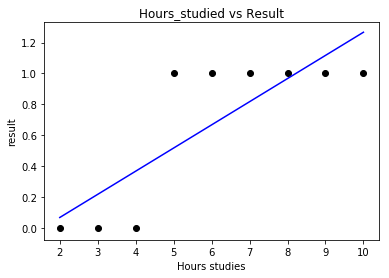

In [7]:
lr =lm.LinearRegression()
#train
lr.fit(x,y)
#generate a plot 
plt.scatter(x,y, color="black")
plt.plot(x, lr.predict(x), color ="blue")
plt.title("Hours_studied vs Result")
plt.xlabel("Hours studies")
plt.ylabel("result")

In [8]:
df['predictedvalue']= lr.predict(x)
df
#since linear regression the values are going above 1 hence its not in use

,Hours_Studied,Result,predictedvalue
0,2,0,0.066667
1,3,0,0.216667
2,4,0,0.366667
3,5,1,0.516667
4,6,1,0.666667
5,7,1,0.816667
6,8,1,0.966667
7,9,1,1.116667
8,10,1,1.266667


In [9]:
x = np.linspace(-10,10,10)
x

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

In [10]:
y = 1.0 /(1.0 + np.exp(-x))
y

array([  4.53978687e-05,   4.18766684e-04,   3.85103236e-03,
         3.44451957e-02,   2.47663801e-01,   7.52336199e-01,
         9.65554804e-01,   9.96148968e-01,   9.99581233e-01,
         9.99954602e-01])

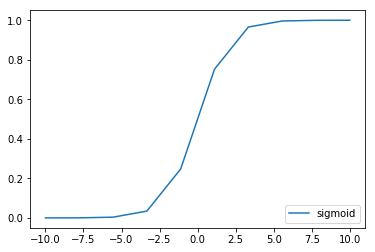

In [11]:
plt.plot(x,y,label='sigmoid')
plt.legend(loc="lower right")

In [12]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
df['intercept']=1
independent_variables = ['Hours_Studied', 'intercept'] 
x =df[independent_variables]
y = df['Result']
model = LogisticRegression()
model = model.fit(x,y)

model.score(x,y)

0.88888888888888884

In [13]:
#predict_proba -- predict probablity is there in logistic regression
#return an array containing probability of y=0 and y=1

print(model.predict_proba(x)[:,1])

[ 0.38623098  0.49994056  0.61365629  0.71619252  0.80036836  0.86430823
  0.91006991  0.94144416  0.96232587]


In [14]:
#predict --> whoseever probibility is greater than 0.5 convert into 1 and if less than 0.5 themn to 0
print(model.predict(x))

[0 0 1 1 1 1 1 1 1]


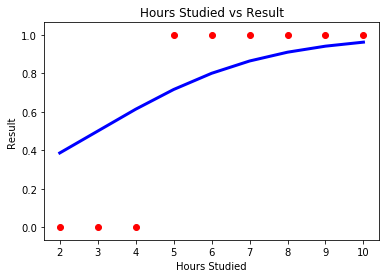

In [19]:
#plot predicted values

plt.scatter(df.Hours_Studied,y,color='red')
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1],color='blue', linewidth=3)
plt.title("Hours Studied vs Result")
plt.xlabel('Hours Studied')
plt.ylabel('Result')
plt.show()

In [20]:
#evaluation of model

from sklearn import metrics
print ("Accuracy :" , metrics.accuracy_score(y, model.predict(x)))

Accuracy : 0.888888888889


In [21]:
#AUC area under curve

print("area under curve :", metrics.roc_auc_score(y,model.predict_proba(x)[:,1]))

area under curve : 1.0


In [23]:
#confusion matrix

print("confusion matrix :\n ", metrics.confusion_matrix(y,model.predict(x)))

#Classification Matrix
print("Classification report\n", metrics.classification_report(y, model.predict(x)))

confusion matrix :
  [[2 1]
 [0 6]]
Classification report
              precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.86      1.00      0.92         6

avg / total       0.90      0.89      0.88         9



In [ ]:
#formula for confusion matrix
#TP -True Positives, TN - True Negatives, FP-False Positives, FN- False Negatives
#accuracy = TP+TN/total
#Misclassification rate = FP+FN /total
#true positive rate = TP/actual yes
# false positive = FP/Actual no
#precision = TP/Predicted yes
#recall = tp / (tp+fn)
#prevalance = Actual yes / total
#f1-score = mean(precision+recall)

# so in our case Tp=6, Tn = 2, Fn = 0, Fp =1

#accuracy = 6+2/9 = 8/9 = 0.88
#precision = 6/7 = 0.85
#recall = 6/6+0 = 1
#f1-score = 1.85/2 = 0.925

